# Scikit-learn Basics for Scientists: A Comprehensive Mathematical Foundation

This notebook provides an in-depth exploration of machine learning fundamentals using scikit-learn, combining rigorous mathematical foundations with practical implementation. We'll cover essential algorithms, statistical principles, and workflows that form the backbone of modern data science.

## What is Machine Learning?

**Machine learning** is fundamentally about finding patterns in data and using these patterns to make predictions or decisions. At its core, it's a statistical approach to building mathematical models from data.

### Mathematical Framework

Given a dataset $\mathcal{D} = \{(x_i, y_i)\}_{i=1}^{n}$ where:
- $x_i \in \mathbb{R}^d$ are feature vectors (input data)
- $y_i$ are target values (outputs we want to predict)
- $n$ is the number of samples
- $d$ is the number of features

**Our goal** is to find a function $f: \mathbb{R}^d \rightarrow \mathbb{R}$ (or $\mathbb{R}^k$ for classification) that:
$$f(x) \approx y$$

### Types of Learning Problems

1. **Supervised Learning**: We have both inputs $x$ and desired outputs $y$
   - **Regression**: $y \in \mathbb{R}$ (continuous values)
   - **Classification**: $y \in \{1, 2, ..., k\}$ (discrete categories)

2. **Unsupervised Learning**: We only have inputs $x$, no labels
   - **Clustering**: Group similar data points
   - **Dimensionality Reduction**: Find lower-dimensional representations

3. **Semi-supervised Learning**: Some labeled, some unlabeled data

### Key Mathematical Concepts

**Loss Function**: Measures how wrong our predictions are
$$\mathcal{L}(y, \hat{y}) = \text{distance between true and predicted values}$$

**Risk Minimization**: Find the best model by minimizing expected loss
$$f^* = \arg\min_{f \in \mathcal{F}} \mathbb{E}_{(x,y) \sim P}[\mathcal{L}(y, f(x))]$$

**Empirical Risk Minimization**: In practice, we minimize loss on our training data
$$\hat{f} = \arg\min_{f \in \mathcal{F}} \frac{1}{n}\sum_{i=1}^{n} \mathcal{L}(y_i, f(x_i))$$

**Bias-Variance Tradeoff**: The fundamental tension in machine learning
- **Bias**: Error from oversimplifying the model
- **Variance**: Error from sensitivity to small fluctuations in training data
- **Total Error** = Bias² + Variance + Irreducible Error

### Why Scikit-learn?

Scikit-learn provides:
- **Consistent API**: All models follow the same `fit()`, `predict()`, `transform()` pattern
- **Robust Implementations**: Well-tested, optimized algorithms
- **Comprehensive Toolkit**: Preprocessing, model selection, evaluation in one place
- **Excellent Documentation**: Mathematical background and practical examples

This notebook will build your understanding from basic regression to advanced ensemble methods, always connecting the mathematics to the implementation.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Set random seed for reproducibility
np.random.seed(42)
plt.rcParams['figure.figsize'] = (10, 6)


## Linear Regression: The Foundation of Predictive Modeling

Linear regression is the cornerstone of statistical learning and machine learning. Despite its simplicity, it embodies fundamental concepts that extend to much more complex algorithms.

### Mathematical Foundation

**The Linear Model**: We assume the relationship between features and target follows:
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_d x_d + \epsilon$$

In matrix form: $\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$

Where:
- $\mathbf{y} \in \mathbb{R}^n$ is the target vector
- $\mathbf{X} \in \mathbb{R}^{n \times (d+1)}$ is the design matrix (including intercept column)
- $\boldsymbol{\beta} \in \mathbb{R}^{d+1}$ are the parameters we want to learn
- $\boldsymbol{\epsilon} \in \mathbb{R}^n$ is random noise, typically $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$

### Ordinary Least Squares (OLS)

**Objective**: Minimize the sum of squared residuals
$$\mathcal{L}(\boldsymbol{\beta}) = \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|_2^2 = \sum_{i=1}^{n}(y_i - \mathbf{x}_i^T\boldsymbol{\beta})^2$$

**Analytical Solution**: Taking the derivative and setting to zero:
$$\frac{\partial\mathcal{L}}{\partial\boldsymbol{\beta}} = -2\mathbf{X}^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) = 0$$

This gives us the **normal equations**:
$$\mathbf{X}^T\mathbf{X}\boldsymbol{\beta} = \mathbf{X}^T\mathbf{y}$$

**Closed-form solution** (when $\mathbf{X}^T\mathbf{X}$ is invertible):
$$\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

### Statistical Properties

1. **Unbiasedness**: $\mathbb{E}[\hat{\boldsymbol{\beta}}] = \boldsymbol{\beta}$ (under standard assumptions)

2. **Variance**: $\text{Var}(\hat{\boldsymbol{\beta}}) = \sigma^2(\mathbf{X}^T\mathbf{X})^{-1}$

3. **Gauss-Markov Theorem**: OLS is the Best Linear Unbiased Estimator (BLUE)

### Key Assumptions

1. **Linearity**: The relationship is linear in parameters
2. **Independence**: Observations are independent
3. **Homoscedasticity**: Constant variance of errors
4. **Normality**: Errors are normally distributed (for inference)
5. **No multicollinearity**: Features are not perfectly correlated

### Evaluation Metrics

**R-squared (Coefficient of Determination)**:
$$R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}} = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$$

- Measures proportion of variance explained by the model
- Range: $[0, 1]$ for valid models, can be negative for poor models

**Root Mean Square Error (RMSE)**:
$$\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

- Has same units as the target variable
- Lower values indicate better fit

**Why Use Linear Regression?**
1. **Interpretability**: Coefficients have clear meaning
2. **Fast computation**: Closed-form solution exists
3. **No hyperparameters**: Simple to use
4. **Strong theoretical foundation**: Well-understood statistical properties
5. **Baseline model**: Good starting point for any regression problem

Linear Regression Results:
R² Score: 0.991
RMSE: 0.755
Slope: 2.499
Intercept: 1.300


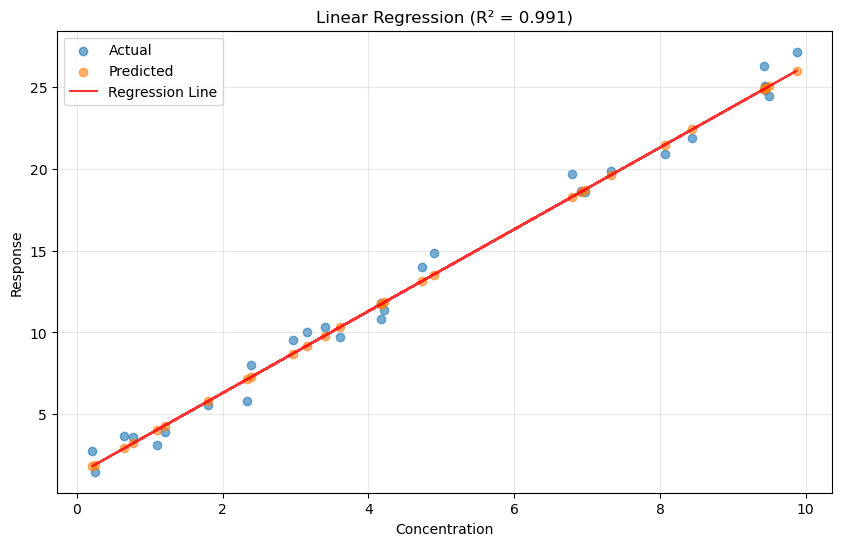

In [10]:
# Generate synthetic experimental data
n_samples = 100
X = np.random.uniform(0, 10, (n_samples, 1))  # Concentration
y = 2.5 * X.ravel() + 1.2 + np.random.normal(0, 0.8, n_samples)  # Response with noise

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate model
r2_score = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f"Linear Regression Results:")
print(f"R² Score: {r2_score:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"Slope: {lr_model.coef_[0]:.3f}")
print(f"Intercept: {lr_model.intercept_:.3f}")

# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.6, label='Actual')
plt.scatter(X_test, y_pred, alpha=0.6, label='Predicted')
plt.plot(X_test, y_pred, 'r-', alpha=0.8, label='Regression Line')
plt.xlabel('Concentration')
plt.ylabel('Response')
plt.title(f'Linear Regression (R² = {r2_score:.3f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Logistic Regression: From Linear to Probabilistic Classification

Logistic regression extends linear regression to classification problems by using the **logistic function** to model probabilities. It's a fundamental algorithm that bridges linear models and probabilistic thinking.

### Mathematical Foundation

**The Problem**: We want to predict class probabilities, but linear regression can produce values outside $[0,1]$.

**The Solution**: Use the **logistic (sigmoid) function**:
$$\sigma(z) = \frac{1}{1 + e^{-z}} = \frac{e^z}{1 + e^z}$$

This function maps any real number to $(0,1)$, perfect for probabilities!

### The Logistic Model

For binary classification, we model:
$$P(Y = 1 | \mathbf{x}) = \sigma(\mathbf{x}^T\boldsymbol{\beta}) = \frac{1}{1 + e^{-\mathbf{x}^T\boldsymbol{\beta}}}$$

**Log-odds (Logit)**: The linear part $\mathbf{x}^T\boldsymbol{\beta}$ represents log-odds:
$$\log\left(\frac{P(Y=1|\mathbf{x})}{P(Y=0|\mathbf{x})}\right) = \mathbf{x}^T\boldsymbol{\beta}$$

This means:
- $\boldsymbol{\beta}_j > 0$: Feature $j$ increases odds of class 1
- $\boldsymbol{\beta}_j < 0$: Feature $j$ decreases odds of class 1
- $\boldsymbol{\beta}_j = 0$: Feature $j$ has no effect

### Maximum Likelihood Estimation

Unlike linear regression, there's no closed-form solution. We use **Maximum Likelihood Estimation (MLE)**.

**Likelihood Function**: Probability of observing our data given parameters
$$\mathcal{L}(\boldsymbol{\beta}) = \prod_{i=1}^{n} P(Y=y_i|\mathbf{x}_i, \boldsymbol{\beta})$$

**Log-Likelihood**: Easier to optimize (logarithm is monotonic)
$$\ell(\boldsymbol{\beta}) = \sum_{i=1}^{n} [y_i \log p_i + (1-y_i) \log(1-p_i)]$$

where $p_i = P(Y=1|\mathbf{x}_i, \boldsymbol{\beta})$

**Optimization**: Use gradient-based methods (Newton-Raphson, BFGS)
$$\boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} + \alpha \nabla\ell(\boldsymbol{\beta}^{(t)})$$

### Multiclass Extension: Softmax

For $K$ classes, we use the **softmax function**:
$$P(Y = k | \mathbf{x}) = \frac{e^{\mathbf{x}^T\boldsymbol{\beta}_k}}{\sum_{j=1}^{K} e^{\mathbf{x}^T\boldsymbol{\beta}_j}}$$

This ensures all probabilities sum to 1: $\sum_{k=1}^{K} P(Y = k | \mathbf{x}) = 1$

### Key Properties

1. **Probabilistic Output**: Provides class probabilities, not just predictions
2. **No distributional assumptions**: Unlike linear regression, doesn't assume normal errors
3. **Linear decision boundary**: In feature space, the decision boundary is linear
4. **Convex optimization**: Log-likelihood is concave, guaranteeing global optimum

### Feature Scaling Importance

**Why scale features for logistic regression?**
- Gradient descent converges faster with similar-scale features
- Coefficients become comparable in magnitude
- Regularization works more effectively

**Standard Scaling**: Transform to zero mean, unit variance
$$x_{\text{scaled}} = \frac{x - \mu}{\sigma}$$

### Evaluation Metrics for Classification

**Confusion Matrix**: Foundation for all classification metrics
```
                Predicted
Actual      0       1
    0      TN      FP
    1      FN      TP
```

**Key Metrics**:
- **Accuracy**: $\frac{TP + TN}{TP + TN + FP + FN}$ - Overall correctness
- **Precision**: $\frac{TP}{TP + FP}$ - Of positive predictions, how many are correct?
- **Recall (Sensitivity)**: $\frac{TP}{TP + FN}$ - Of actual positives, how many did we catch?
- **Specificity**: $\frac{TN}{TN + FP}$ - Of actual negatives, how many did we correctly identify?
- **F1-Score**: $\frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$ - Harmonic mean of precision and recall

### ROC and AUC

**ROC Curve**: Plots True Positive Rate vs False Positive Rate at various thresholds
- **True Positive Rate (TPR)** = Recall = $\frac{TP}{TP + FN}$
- **False Positive Rate (FPR)** = $\frac{FP}{FP + TN}$

**AUC (Area Under Curve)**: 
- Perfect classifier: AUC = 1.0
- Random classifier: AUC = 0.5
- Interpretation: Probability that the model ranks a random positive instance higher than a random negative instance

### When to Use Logistic Regression

**Advantages**:
- Fast training and prediction
- No tuning of hyperparameters required
- Doesn't require feature scaling (but benefits from it)
- Less prone to overfitting with low-dimensional data
- Provides probabilistic output
- Excellent baseline model

**Limitations**:
- Assumes linear relationship between features and log-odds
- Can struggle with complex relationships
- Sensitive to outliers
- Requires large sample sizes for stable results

In [13]:
# Load iris dataset (classic classification example)
iris = datasets.load_iris()

X = iris.data[:, :2]  # Use only first two features for visualization
y = iris.target
# print(iris)
print(iris.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
# Precision, recall, PRAUC, AUROC. 


# precision = TP/(TP+FP)
# of the ones predicted to be pos, what prop actually were?
# high precision: low fp
# Example: "When I predict cancer, how often am I right?"
#
# 
# Recall / sensitivity / true positive rate: 
# Of the set of all actual positives, what proportion did I manage to get? 
# TP / all pos = TP / (TP/FN)
# Of all the samples that truly belong to this class, how many did I catch?
# High recall = low false negatives.
# Example: "Of all actual cancer patients, how many did I detect?"
#
#
# F1 score
# 2 x (precision x recall)/ (precision + recall)
# Harmonic mean of precision and recall.
# Balances both, useful when classes are imbalanced.
# High only if both precision and recall are high.

'''
========== ROC-AUC ==========
axes: TPR = recall = sensitivity) vs FPR. 

TPR = recall = sensitivity = TP/all actual positives = TP / (TP+FN)
!!! WRONG---> FPR = FP/all the positives you call out = FP / (FP+TP) <--- WRONG!!!!

FPR = of all actual negatives, how many did you mistakenly call out to be positive? 
= FP / (FP+TN)

Note: 
FP = Type 1 error
FN = Type 2 error. 

ROC looks at trade-off between sensitivity (TPR) and false alarm rate (FPR) across thresholds. 
It uses both classes symmetrically because FPR is normalized by negatives and TPR by positives.

PR focuses entirely on the positive class: how many predicted positives are correct (precision) 
as you sweep recall. It highlights performance when you must retrieve true positives among many negatives.

What problem AP solves
In a ranking/classification setting, the model gives a score to each example.
To compute precision and recall, you pick a threshold: above threshold = positive, below = negative.
As you sweep the threshold, you trace out a Precision–Recall (PR) curve.
Unlike AUROC (which is a geometric area), the PR curve does not have a simple trapezoid integration 
because precision can jump in a stepwise way whenever a new positive is retrieved.
So Average Precision (AP) is defined in a discrete summation form.

Also: what is ARI and its 

'''



'\n========== ROC-AUC ==========\naxes: TPR = recall = sensitivity) vs FPR: \n\nTPR = recall = sensitivity = TP/all actual positives = TP / (TP+FN)\n!!! WRONG---> FPR = FP/all the positives you call out = FP / (FP+TP) <--- WRONG!!!!\n\nFPR = ratio between the number of negative events wrongly categorized as positive \n(false positives) and the total number of actual negative events (regardless of classification)\n\n\n\n\n\n'

Logistic Regression Results:
Accuracy: 0.822

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.78      0.54      0.64        13
   virginica       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.81      0.79      0.79        45
weighted avg       0.83      0.82      0.82        45



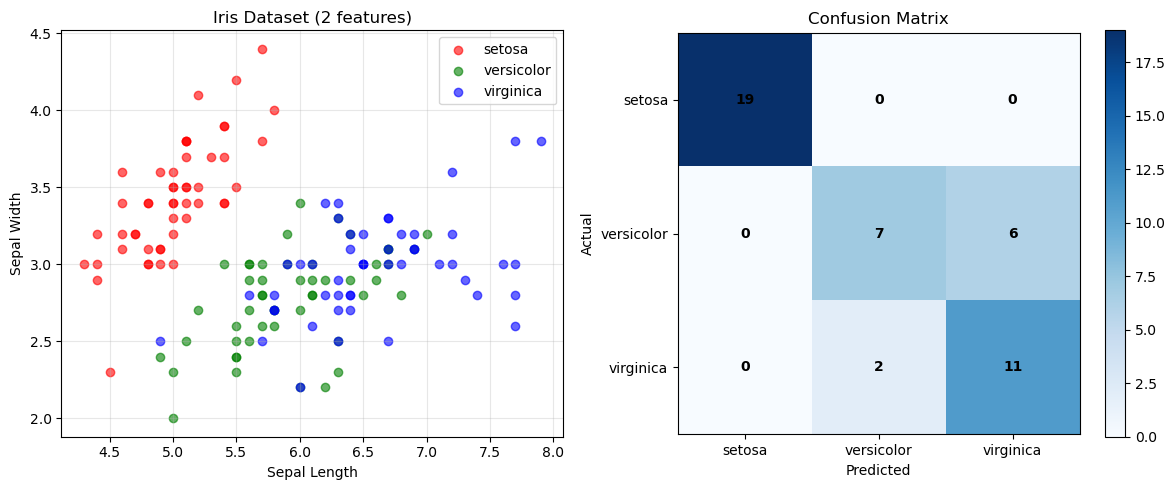

In [19]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # do not use fit_transform for test to prevent data leakage.

# Train logistic regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)

# Evaluate
accuracy = metrics.accuracy_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

print(f"Logistic Regression Results:")
print(f"Accuracy: {accuracy:.3f}")
print(f"\nClassification Report:")
print(metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

# Visualize decision boundaries
plt.figure(figsize=(12, 5))

# Plot 1: Data points
plt.subplot(1, 2, 1)
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1], c=color, label=iris.target_names[i], alpha=0.6)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset (2 features)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Confusion matrix
plt.subplot(1, 2, 2)
plt.imshow(conf_matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(range(3), iris.target_names)
plt.yticks(range(3), iris.target_names)

# Add text annotations
for i in range(3):
    for j in range(3):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Random Forest: The Power of Ensemble Learning

Random Forest represents a paradigm shift from single models to **ensemble methods** - combining multiple weak learners to create a strong predictor. It's one of the most successful and widely-used machine learning algorithms.

### Ensemble Learning Philosophy

**Key Insight**: Many weak learners can be better than one strong learner.

**Wisdom of Crowds**: If individual models make different types of errors, their combination can be more accurate than any individual model.

**Mathematical Foundation**: For regression, if we have $M$ models with predictions $\hat{y}_1, \hat{y}_2, ..., \hat{y}_M$:
$$\hat{y}_{\text{ensemble}} = \frac{1}{M}\sum_{m=1}^{M} \hat{y}_m$$

**Variance Reduction**: If individual models have variance $\sigma^2$ and are uncorrelated:
$$\text{Var}(\hat{y}_{\text{ensemble}}) = \frac{\sigma^2}{M}$$

This means ensemble variance decreases as we add more uncorrelated models!

### Decision Trees: The Building Blocks

Random Forest builds upon **decision trees**, so let's understand them first.

**Decision Tree Algorithm**:
1. Start with entire dataset at root
2. Find the best feature and threshold to split data
3. Create two child nodes with the split
4. Recursively repeat until stopping criterion

**Splitting Criteria**:

For **regression** (minimize MSE):
$$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \bar{y})^2$$

For **classification** (minimize Gini impurity):
$$\text{Gini} = 1 - \sum_{k=1}^{K} p_k^2$$

where $p_k$ is the proportion of samples belonging to class $k$.

**Information Gain**: Choose split that maximizes:
$$\text{IG} = H(\text{parent}) - \sum_{j} \frac{|D_j|}{|D|} H(D_j)$$

where $H$ is the impurity measure (Gini or entropy).

### Random Forest Algorithm

Random Forest adds **two key randomizations** to decision trees:

1. **Bootstrap Sampling (Bagging)**: Train each tree on a random subset of data
2. **Random Feature Selection**: At each split, consider only a random subset of features

**Detailed Algorithm**:
```
For b = 1 to B (number of trees):
    1. Draw bootstrap sample S_b of size n from training data
    2. Train tree T_b on S_b with modification:
       - At each node, randomly select m features from p total features
       - Find best split among these m features only
    3. Grow tree fully (no pruning) or until min_samples_leaf
```

**Prediction**:
- **Regression**: $\hat{y} = \frac{1}{B}\sum_{b=1}^{B} T_b(\mathbf{x})$
- **Classification**: $\hat{y} = \text{majority vote of } T_b(\mathbf{x})$

### Mathematical Analysis

**Why Bootstrap Sampling?**
- Creates diverse training sets
- Each tree sees ~63.2% of original data (due to sampling with replacement)
- Out-of-bag (OOB) samples (~36.8%) provide built-in validation

**Why Random Feature Selection?**
- Decorrelates trees (reduces ensemble variance)
- Prevents strong features from dominating all trees
- Typical choice: $m = \sqrt{p}$ for classification, $m = p/3$ for regression

**Out-of-Bag Error**:
$$\text{OOB Error} = \frac{1}{n}\sum_{i=1}^{n} \mathcal{L}(y_i, \hat{y}_i^{\text{OOB}})$$

where $\hat{y}_i^{\text{OOB}}$ is prediction using only trees that didn't see sample $i$.

### Feature Importance

Random Forest provides two types of feature importance:

**1. Mean Decrease Impurity (MDI)**:
$$\text{Importance}_j = \frac{1}{B}\sum_{b=1}^{B} \sum_{t \in T_b} p(t) \Delta_t \mathbb{I}(\text{feature}_t = j)$$

where:
- $p(t)$ is proportion of samples reaching node $t$
- $\Delta_t$ is impurity decrease at node $t$
- $\mathbb{I}$ is indicator function

**2. Mean Decrease Accuracy (MDA)**:
1. Calculate OOB accuracy
2. Randomly permute feature $j$ in OOB samples
3. Recalculate OOB accuracy
4. Importance = Original accuracy - Permuted accuracy

MDA is generally more reliable but computationally expensive.

### Hyperparameters and Their Effects

**Key Hyperparameters**:

1. **`n_estimators`** (Number of trees):
   - More trees → better performance, but diminishing returns
   - Typical range: 100-1000
   - **Rule**: Keep increasing until OOB error stabilizes

2. **`max_features`** (Features per split):
   - Controls randomness and tree correlation
   - Too low → high bias, too high → high variance
   - **Defaults**: $\sqrt{p}$ (classification), $p/3$ (regression)

3. **`max_depth`**:
   - Controls individual tree complexity
   - Deeper trees → more complex patterns but higher variance
   - **Default**: None (grow until pure leaves)

4. **`min_samples_split`** and **`min_samples_leaf`**:
   - Control tree growth and overfitting
   - Higher values → simpler trees, lower variance

### Advantages of Random Forest

1. **Robust to overfitting**: Ensemble averaging reduces variance
2. **Handles mixed data types**: Categorical and numerical features
3. **No feature scaling required**: Tree-based splits are scale-invariant
4. **Built-in feature importance**: Understands feature relevance
5. **Handles missing values**: Can work with incomplete data
6. **Parallelizable**: Trees can be trained independently
7. **Good default performance**: Often works well out-of-the-box

### Limitations

1. **Memory intensive**: Stores all trees in memory
2. **Prediction speed**: Slower than single models
3. **Less interpretable**: Harder to understand than single tree
4. **Biased toward categorical features**: With many categories
5. **Poor extrapolation**: Can't predict outside training range

### Cross-Validation with Random Forest

**Why cross-validation?**
- OOB error is good but cross-validation provides more robust estimates
- Helps tune hyperparameters
- Provides confidence intervals

**Stratified K-Fold**: Maintains class proportions in each fold
$$\text{CV Error} = \frac{1}{K}\sum_{k=1}^{K} \mathcal{L}(\mathbf{y}_k, \hat{\mathbf{y}}_k)$$

### Practical Tips

1. **Start with defaults**: Random Forest often works well without tuning
2. **Increase n_estimators**: Until performance plateaus
3. **Tune max_features**: Try different values around default
4. **Monitor OOB score**: Use for early stopping and model selection
5. **Feature engineering**: Random Forest benefits from good features
6. **Check feature importance**: Remove irrelevant features for speed

In [29]:
# Use all iris features for random forest
X_full = iris.data
y_full = iris.target

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

# Train Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)

# also, predict the class probabilities
X_test[:5].shape
full_probs = rf_classifier.predict_proba(X_test[:7])
print(full_probs)
print(y_test[:7])
# help(iris)

[[0.   0.97 0.03]
 [1.   0.   0.  ]
 [0.   0.02 0.98]
 [0.   0.99 0.01]
 [0.   0.92 0.08]
 [1.   0.   0.  ]
 [0.   1.   0.  ]]
[1 0 2 1 1 0 1]


            features  importances
0  sepal length (cm)     0.104105
1   sepal width (cm)     0.044605
2  petal length (cm)     0.417308
3   petal width (cm)     0.433982
Random Forest Results:
Accuracy: 1.000

Feature Importance:
sepal length (cm): 0.104
sepal width (cm): 0.045
petal length (cm): 0.417
petal width (cm): 0.434

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV accuracy: 0.967 ± 0.021


<function matplotlib.pyplot.show(close=None, block=None)>

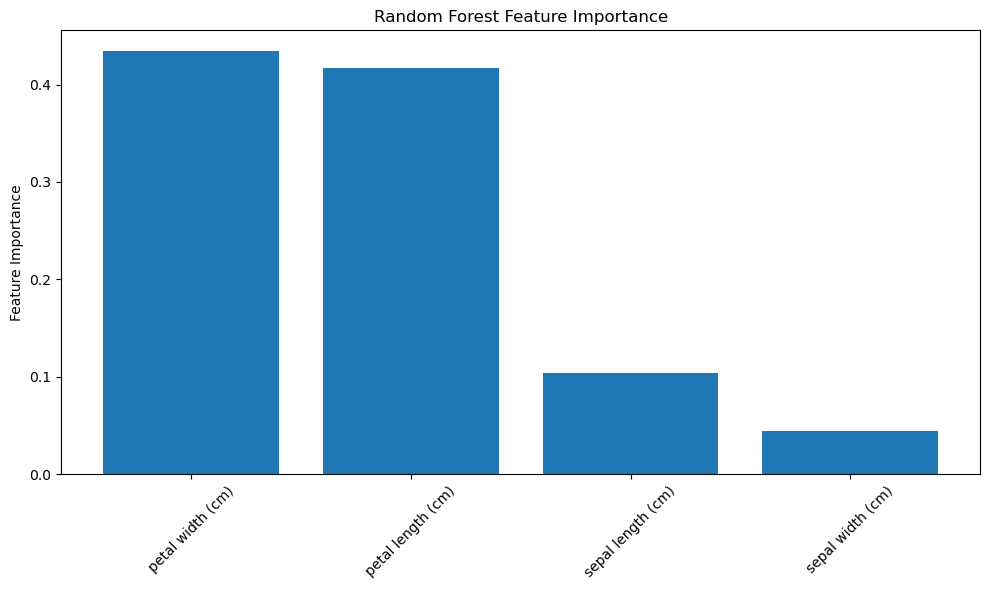

In [23]:


# Feature importance
feature_importance = rf_classifier.feature_importances_
feature_names = iris.feature_names
fidf=pd.DataFrame({'features':feature_names,'importances':feature_importance})
print(fidf)
print(f"Random Forest Results:")
print(f"Accuracy: {accuracy_rf:.3f}")
print(f"\nFeature Importance:")
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance:.3f}")

# Cross-validation
cv_scores = cross_val_score(rf_classifier, X_full, y_full, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importance)[::-1]
plt.bar(range(len(feature_importance)), feature_importance[indices])
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in indices], rotation=45)
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show

## K-Means Clustering: Discovering Hidden Structure

K-Means is the most widely used clustering algorithm, representing the foundation of **unsupervised learning**. Unlike supervised learning, we don't have target labels - instead, we seek to discover hidden patterns and structure in data.

### Unsupervised Learning Philosophy

**Goal**: Find hidden structure in data without labeled examples
- **Clustering**: Group similar data points together
- **Dimensionality Reduction**: Find lower-dimensional representations
- **Density Estimation**: Model the probability distribution of data
- **Anomaly Detection**: Identify unusual or outlying observations

### K-Means Mathematical Foundation

**Objective**: Partition $n$ data points into $k$ clusters to minimize **within-cluster sum of squares (WCSS)**:

$$J = \sum_{i=1}^{k} \sum_{\mathbf{x} \in C_i} \|\mathbf{x} - \boldsymbol{\mu}_i\|^2$$

Where:
- $C_i$ is the set of points in cluster $i$
- $\boldsymbol{\mu}_i$ is the centroid of cluster $i$: $\boldsymbol{\mu}_i = \frac{1}{|C_i|}\sum_{\mathbf{x} \in C_i} \mathbf{x}$

This is an **NP-hard optimization problem**, but we can find good local optima.

### Lloyd's Algorithm

The standard K-Means algorithm alternates between two steps:

**Initialization**: Choose $k$ initial centroids $\boldsymbol{\mu}_1, ..., \boldsymbol{\mu}_k$

**Repeat until convergence**:
1. **Assignment Step**: Assign each point to nearest centroid
   $$C_i^{(t)} = \{\mathbf{x}_j : \|\mathbf{x}_j - \boldsymbol{\mu}_i^{(t)}\| \leq \|\mathbf{x}_j - \boldsymbol{\mu}_l^{(t)}\| \text{ for all } l\}$$

2. **Update Step**: Recalculate centroids
   $$\boldsymbol{\mu}_i^{(t+1)} = \frac{1}{|C_i^{(t)}|}\sum_{\mathbf{x} \in C_i^{(t)}} \mathbf{x}$$

**Convergence**: Algorithm stops when centroids don't change significantly or maximum iterations reached.

### Mathematical Properties

**Convergence Guarantee**: K-Means is guaranteed to converge to a local minimum
- Each step reduces or maintains the objective function value
- Finite number of possible partitions ensures termination

**Local Optima Problem**: Different initializations can lead to different solutions
- **Solution**: Run multiple times with different random initializations
- **K-Means++**: Smart initialization that improves convergence

### K-Means++ Initialization

**Problem**: Random initialization can lead to poor local optima

**Solution**: Choose initial centroids with probability proportional to squared distance from nearest existing centroid

**Algorithm**:
1. Choose first centroid uniformly at random
2. For each remaining centroid:
   - Calculate $D(\mathbf{x})^2$ = squared distance to nearest chosen centroid
   - Choose new centroid with probability $\propto D(\mathbf{x})^2$

**Why it works**: Spreads centroids apart, leading to better initial configuration

### Assumptions and Limitations

**Key Assumptions**:
1. **Spherical clusters**: Assumes clusters are roughly circular/spherical
2. **Similar sizes**: Works best when clusters have similar number of points
3. **Similar densities**: Assumes clusters have similar variance
4. **Linear separability**: In the space of squared distances to centroids

**Limitations**:
- **Sensitive to initialization**: Can get stuck in poor local optima
- **Must specify k**: Need to know number of clusters in advance
- **Sensitive to outliers**: Outliers can significantly affect centroids
- **Struggles with non-spherical clusters**: e.g., elongated or irregularly shaped clusters

### Choosing the Number of Clusters (k)

**1. Elbow Method**: Plot WCSS vs k and look for "elbow"
$$\text{WCSS}(k) = \sum_{i=1}^{k} \sum_{\mathbf{x} \in C_i} \|\mathbf{x} - \boldsymbol{\mu}_i\|^2$$

- **Elbow point**: Where adding more clusters doesn't significantly reduce WCSS
- **Problem**: Elbow not always clear

**2. Silhouette Analysis**: Measures how well-separated clusters are

For each point $i$:
- $a(i)$ = average distance to points in same cluster
- $b(i)$ = minimum average distance to points in other clusters

**Silhouette coefficient**:
$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

**Average silhouette score**:
$$\text{Silhouette Score} = \frac{1}{n}\sum_{i=1}^{n} s(i)$$

**Interpretation**:
- $s(i) \approx 1$: Point is well-clustered
- $s(i) \approx 0$: Point is on border between clusters
- $s(i) \approx -1$: Point might be in wrong cluster

**3. Gap Statistic**: Compares WCSS to what's expected under null hypothesis
$$\text{Gap}(k) = \mathbb{E}[\log(\text{WCSS}_{null}(k))] - \log(\text{WCSS}(k))$$

Choose $k$ where gap is largest.

### Variants and Extensions

**1. K-Means++**: Improved initialization (discussed above)

**2. Mini-Batch K-Means**: Uses random subsets for scalability
- Faster for large datasets
- Slightly lower quality but much faster

**3. K-Medoids (PAM)**: Uses actual data points as cluster centers
- More robust to outliers
- Works with any distance metric
- More computationally expensive

**4. Fuzzy C-Means**: Soft clustering where points can belong to multiple clusters
$$u_{ij} = \frac{1}{\sum_{k=1}^{c} \left(\frac{d_{ij}}{d_{ik}}\right)^{\frac{2}{m-1}}}$$

### Evaluation Metrics

**Internal Metrics** (no ground truth needed):
- **Inertia/WCSS**: Lower is better
- **Silhouette Score**: Higher is better (range [-1, 1])
- **Calinski-Harabasz Index**: Ratio of between-cluster to within-cluster variance

**External Metrics** (when ground truth available):
- **Adjusted Rand Index (ARI)**: Measures similarity to true clustering
- **Normalized Mutual Information (NMI)**: Information shared between clusterings
- **V-measure**: Harmonic mean of homogeneity and completeness

### Distance Metrics

**Euclidean Distance** (default):
$$d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{j=1}^{d}(x_j - y_j)^2}$$

**Manhattan Distance**:
$$d(\mathbf{x}, \mathbf{y}) = \sum_{j=1}^{d}|x_j - y_j|$$

**Important**: K-Means assumes Euclidean distance. For other metrics, use K-Medoids.

### Feature Scaling Importance

**Why scale features?**
- K-Means uses Euclidean distance
- Features with larger scales dominate the clustering
- Can lead to poor cluster quality

**Example**: Height (cm) vs Weight (kg) - height will dominate without scaling

**Scaling Methods**:
- **Standardization**: $z = \frac{x - \mu}{\sigma}$ (mean=0, std=1)
- **Min-Max**: $x' = \frac{x - \min}{\max - \min}$ (range [0,1])
- **Robust Scaling**: Uses median and IQR, robust to outliers

### Practical Considerations

**When to use K-Means**:
- Large datasets (scales well)
- Spherical clusters expected
- Fast results needed
- Continuous numerical features

**Preprocessing Steps**:
1. Handle missing values
2. Scale features appropriately
3. Remove or handle outliers
4. Consider dimensionality reduction if high-dimensional

**Hyperparameter Tuning**:
- **n_clusters**: Use elbow method or silhouette analysis
- **init**: Use 'k-means++' (default)
- **n_init**: Number of random initializations (default: 10)
- **max_iter**: Maximum iterations (default: 300)
- **tol**: Convergence tolerance (default: 1e-4)

**Computational Complexity**:
- **Time**: $O(n \cdot k \cdot d \cdot i)$ where $i$ is number of iterations
- **Space**: $O(n \cdot d)$
- Generally scales well to large datasets

K-Means Clustering Results:
Silhouette Score: 0.705
Inertia: 598.514


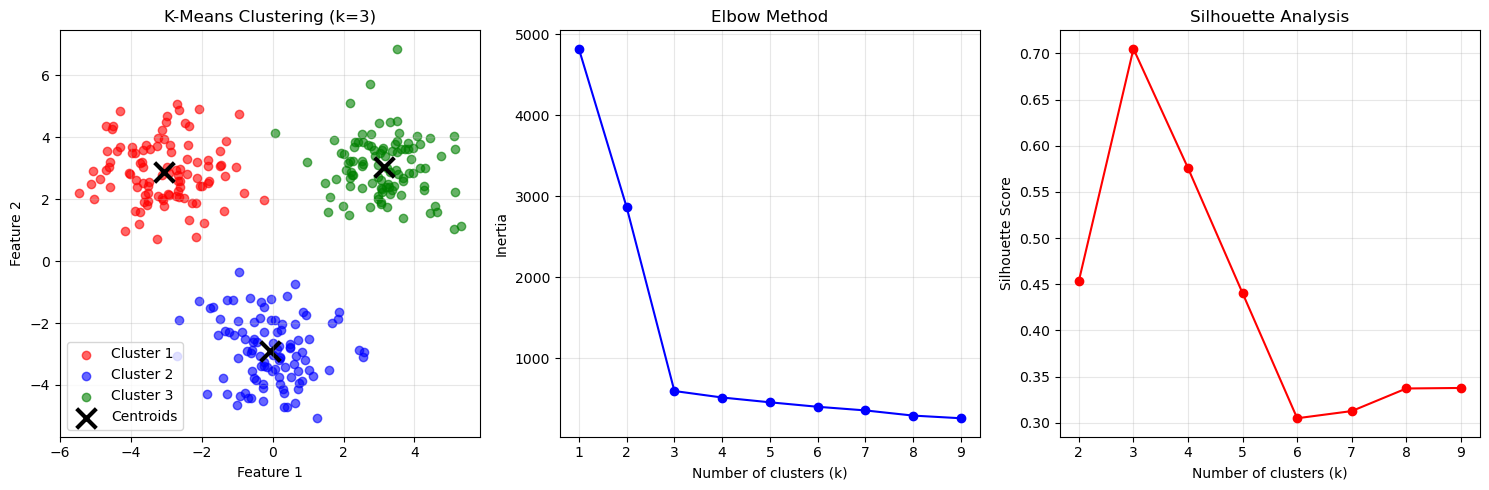

In [5]:
# Generate synthetic data for clustering
n_samples = 300
X_cluster = np.random.randn(n_samples, 2)
# Add some structure
X_cluster[:100] += [3, 3]
X_cluster[100:200] += [-3, 3]
X_cluster[200:] += [0, -3]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster)
cluster_centers = kmeans.cluster_centers_

# Evaluate clustering using silhouette score
silhouette_avg = metrics.silhouette_score(X_cluster, cluster_labels)
print(f"K-Means Clustering Results:")
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Inertia: {kmeans.inertia_:.3f}")

# Determine optimal number of clusters using elbow method
k_range = range(1, 10)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X_cluster)
    inertias.append(kmeans_temp.inertia_)
    if k > 1:
        silhouette_scores.append(metrics.silhouette_score(X_cluster, kmeans_temp.labels_))

# Visualize results
plt.figure(figsize=(15, 5))

# Plot 1: Clustering results
plt.subplot(1, 3, 1)
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(3):
    mask = cluster_labels == i
    plt.scatter(X_cluster[mask, 0], X_cluster[mask, 1], 
               c=colors[i], alpha=0.6, label=f'Cluster {i+1}')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
           c='black', marker='x', s=200, linewidths=3, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering (k=3)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Elbow method
plt.subplot(1, 3, 2)
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True, alpha=0.3)

# Plot 3: Silhouette scores
plt.subplot(1, 3, 3)
plt.plot(range(2, 10), silhouette_scores, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Principal Component Analysis (PCA): The Mathematics of Dimensionality Reduction

PCA is one of the most important and widely used techniques in data science. It's a fundamental tool for **dimensionality reduction**, **data visualization**, and **feature extraction** that has deep mathematical foundations in linear algebra and statistics.

### The Curse of Dimensionality

**High-dimensional data challenges**:
- **Visualization**: Can't plot more than 3D effectively
- **Computational cost**: Algorithms scale poorly with dimensions
- **Storage**: More memory needed
- **Noise**: High dimensions often contain irrelevant information
- **Overfitting**: Models can memorize noise in high dimensions

**PCA Solution**: Find a lower-dimensional representation that captures most of the variation in the data.

### Mathematical Foundation

**Goal**: Find new axes (principal components) such that:
1. **First component** explains maximum variance
2. **Second component** explains maximum remaining variance, orthogonal to first
3. Continue until all variance explained

**Mathematical Setup**: Given data matrix $\mathbf{X} \in \mathbb{R}^{n \times d}$
- $n$ samples, $d$ features
- Assume data is centered: $\sum_{i=1}^{n} \mathbf{x}_i = \mathbf{0}$

### The Variance Maximization Problem

**First Principal Component**: Find unit vector $\mathbf{w}_1$ that maximizes variance of projections

**Projection**: For any point $\mathbf{x}_i$, its projection onto $\mathbf{w}_1$ is: $\mathbf{x}_i^T \mathbf{w}_1$

**Sample Variance** of projections:
$$\text{Var} = \frac{1}{n-1}\sum_{i=1}^{n}(\mathbf{x}_i^T \mathbf{w}_1)^2 = \frac{1}{n-1}\mathbf{w}_1^T \mathbf{X}^T \mathbf{X} \mathbf{w}_1$$

**Optimization Problem**:
$$\max_{\mathbf{w}_1} \mathbf{w}_1^T \mathbf{S} \mathbf{w}_1 \quad \text{subject to} \quad \|\mathbf{w}_1\|_2 = 1$$

where $\mathbf{S} = \frac{1}{n-1}\mathbf{X}^T\mathbf{X}$ is the **sample covariance matrix**.

### Eigenvalue Decomposition Solution

**Lagrangian**: Using Lagrange multipliers for the constraint:
$$\mathcal{L} = \mathbf{w}_1^T \mathbf{S} \mathbf{w}_1 - \lambda({\mathbf{w}_1}^T \mathbf{w}_1 - 1)$$

**Taking derivative** and setting to zero:
$$\frac{\partial \mathcal{L}}{\partial \mathbf{w}_1} = 2\mathbf{S}\mathbf{w}_1 - 2\lambda\mathbf{w}_1 = 0$$

**Eigenvalue equation**:
$$\mathbf{S}\mathbf{w}_1 = \lambda \mathbf{w}_1$$

**Key insight**: The first principal component is the **eigenvector** of the covariance matrix corresponding to the **largest eigenvalue**!

**Complete Solution**: 
- **Principal components** = eigenvectors of covariance matrix
- **Explained variance** = corresponding eigenvalues
- Order components by decreasing eigenvalue

### The Eigenvalue Decomposition

**Covariance Matrix**: $\mathbf{S} = \mathbf{V}\boldsymbol{\Lambda}\mathbf{V}^T$

Where:
- $\mathbf{V} = [\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_d]$ are eigenvectors (principal components)
- $\boldsymbol{\Lambda} = \text{diag}(\lambda_1, \lambda_2, ..., \lambda_d)$ with $\lambda_1 \geq \lambda_2 \geq ... \geq \lambda_d$

**Properties**:
- Eigenvectors are orthonormal: $\mathbf{v}_i^T \mathbf{v}_j = \delta_{ij}$
- Total variance = $\text{tr}(\mathbf{S}) = \sum_{i=1}^{d} \lambda_i$

### PCA Transformation

**Projection to PC space**: Transform data to principal component coordinates
$$\mathbf{Z} = \mathbf{X}\mathbf{V}$$

where $\mathbf{Z} \in \mathbb{R}^{n \times d}$ are the **principal component scores**.

**Dimensionality Reduction**: Keep only first $k$ components
$$\mathbf{Z}_k = \mathbf{X}\mathbf{V}_k$$

where $\mathbf{V}_k$ contains first $k$ columns of $\mathbf{V}$.

**Reconstruction**: Project back to original space
$$\hat{\mathbf{X}} = \mathbf{Z}_k \mathbf{V}_k^T$$

### Explained Variance Analysis

**Explained Variance Ratio**: Proportion of total variance explained by component $i$:
$$\text{EVR}_i = \frac{\lambda_i}{\sum_{j=1}^{d} \lambda_j}$$

**Cumulative Explained Variance**:
$$\text{CEV}_k = \frac{\sum_{i=1}^{k} \lambda_i}{\sum_{j=1}^{d} \lambda_j}$$

**Choosing number of components**:
- **Kaiser criterion**: Keep components with $\lambda_i > 1$ (if standardized)
- **Scree plot**: Look for "elbow" in eigenvalue plot
- **Variance threshold**: Keep components until desired % variance explained (e.g., 95%)

### Geometric Interpretation

**PCA finds orthogonal directions of maximum variance**:
1. First PC points in direction of greatest spread
2. Second PC points in direction of greatest remaining spread, perpendicular to first
3. And so on...

**Visualization**: Think of fitting an ellipsoid to data - PC axes are the ellipsoid axes.

### Standardization: A Critical Decision

**When to standardize?**

**Covariance PCA** (no standardization):
- Uses original units
- Features with larger variance dominate
- Appropriate when features have similar scales and units

**Correlation PCA** (standardization):
- All features have unit variance
- Each feature contributes equally
- Appropriate when features have different scales/units

**Mathematical difference**:
- Covariance PCA: Eigen-decomposition of $\mathbf{S} = \frac{1}{n-1}\mathbf{X}^T\mathbf{X}$
- Correlation PCA: Eigen-decomposition of correlation matrix $\mathbf{R}$

### Singular Value Decomposition (SVD) Approach

**Alternative computation**: Instead of eigenvalues of $\mathbf{X}^T\mathbf{X}$, use SVD of $\mathbf{X}$:

$$\mathbf{X} = \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^T$$

**Relationship to PCA**:
- $\mathbf{V}$ are the principal components
- $\boldsymbol{\Sigma}^2/(n-1)$ are the eigenvalues
- $\mathbf{U}\boldsymbol{\Sigma}$ are the principal component scores

**Advantages of SVD approach**:
- More numerically stable
- Avoids computing $\mathbf{X}^T\mathbf{X}$ explicitly
- Default method in most implementations

### Component Loadings and Interpretation

**Loadings**: Correlation between original features and principal components
$$\text{Loading}_{ij} = \text{Corr}(X_j, PC_i) = \frac{\mathbf{v}_{ij}\sqrt{\lambda_i}}{\sqrt{\text{Var}(X_j)}}$$

**Interpretation**:
- High absolute loading: Feature contributes strongly to component
- Positive/negative loading: Direction of relationship
- Loadings help understand what each PC represents

### PCA Assumptions and Limitations

**Assumptions**:
1. **Linearity**: Relationships are linear
2. **Large variances have important structure**: Not always true
3. **Principal components are meaningful**: Interpretability not guaranteed
4. **Data is centered**: Usually handled automatically

**Limitations**:
1. **Linear transformation only**: Can't capture non-linear patterns
2. **All components are linear combinations**: May not be interpretable
3. **Sensitive to outliers**: Extreme values can dominate
4. **Assumes continuous variables**: Categorical variables need special handling

### Practical Guidelines

**When to use PCA**:
- **High-dimensional data**: Many features
- **Correlated features**: PCA removes redundancy
- **Visualization**: Reduce to 2D or 3D for plotting
- **Preprocessing**: Before applying other ML algorithms
- **Data compression**: Store data in fewer dimensions

**Best practices**:
1. **Examine data first**: Plot histograms, check for outliers
2. **Decide on standardization**: Based on feature scales
3. **Check explained variance**: How many components needed?
4. **Interpret components**: What do they represent?
5. **Validate with domain knowledge**: Do results make sense?

### Advanced Topics

**Kernel PCA**: Non-linear extension using kernel trick
$$\mathbf{K}_{ij} = k(\mathbf{x}_i, \mathbf{x}_j)$$

**Sparse PCA**: Encourages sparse loadings for interpretability

**Incremental PCA**: For datasets too large for memory

**Probabilistic PCA**: Bayesian perspective with explicit noise model

### Computational Complexity

**Standard PCA**: $O(d^3 + nd^2)$
- $O(nd^2)$: Computing covariance matrix
- $O(d^3)$: Eigenvalue decomposition

**SVD approach**: $O(nd \min(n,d))$
- More efficient when $n \ll d$ or $d \ll n$

**Memory**: $O(nd + d^2)$ for storing data and covariance matrix

PCA Results:
Explained variance by component 1: 0.730
Explained variance by component 2: 0.229
Total variance explained: 0.958

PCA Components (loadings):
PC1: [ 0.52106591 -0.26934744  0.5804131   0.56485654]
PC2: [0.37741762 0.92329566 0.02449161 0.06694199]


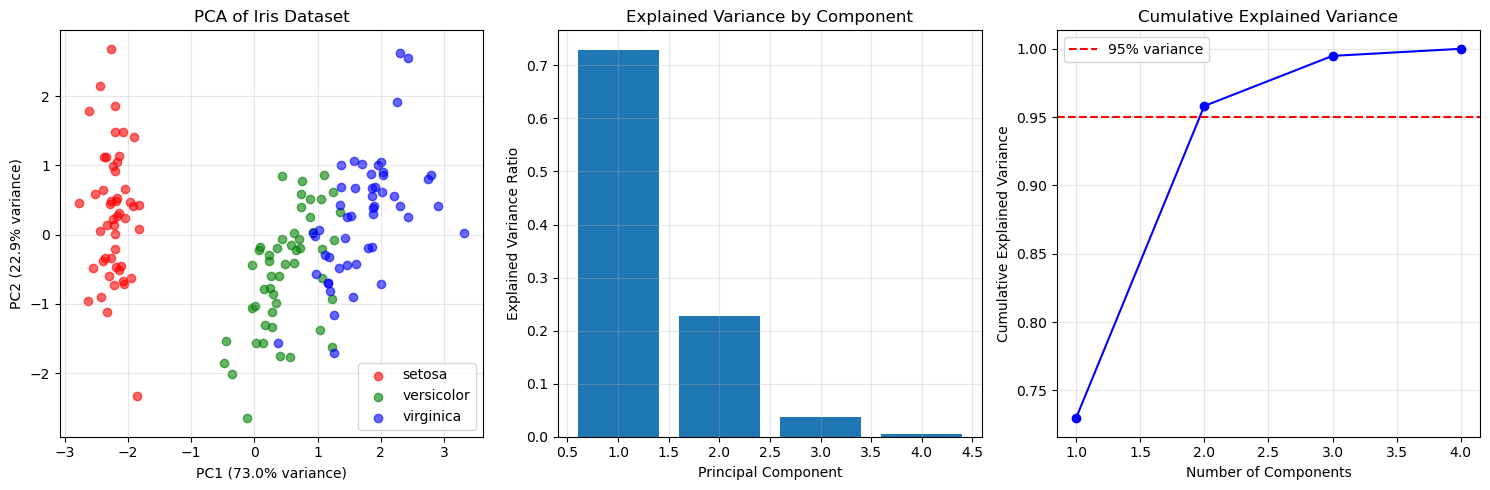

In [6]:
# Use iris dataset for PCA
X_iris = iris.data
y_iris = iris.target

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_iris)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2D for visualization
X_pca = pca.fit_transform(X_scaled)

# Print explained variance
explained_variance_ratio = pca.explained_variance_ratio_
total_variance = explained_variance_ratio.sum()

print(f"PCA Results:")
print(f"Explained variance by component 1: {explained_variance_ratio[0]:.3f}")
print(f"Explained variance by component 2: {explained_variance_ratio[1]:.3f}")
print(f"Total variance explained: {total_variance:.3f}")

# Component loadings
components = pca.components_
print(f"\nPCA Components (loadings):")
for i, component in enumerate(components):
    print(f"PC{i+1}: {component}")

# Analyze all components
pca_full = PCA()
pca_full.fit(X_scaled)
cumsum_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Visualize results
plt.figure(figsize=(15, 5))

# Plot 1: PCA scatter plot
plt.subplot(1, 3, 1)
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    mask = y_iris == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=color, label=iris.target_names[i], alpha=0.6)
plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.1%} variance)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.1%} variance)')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Explained variance
plt.subplot(1, 3, 2)
plt.bar(range(1, 5), pca_full.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.grid(True, alpha=0.3)

# Plot 3: Cumulative explained variance
plt.subplot(1, 3, 3)
plt.plot(range(1, 5), cumsum_variance, 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Model Comparison and Selection: The Science of Choosing the Right Algorithm

Model selection is both an art and a science. It requires understanding the mathematical properties of different algorithms, the nature of your data, and the trade-offs inherent in machine learning. This section provides a comprehensive framework for making informed decisions.

### The Model Selection Problem

**Fundamental Question**: Given multiple algorithms, how do we choose the best one?

**Key Considerations**:
1. **Performance**: Which model makes the most accurate predictions?
2. **Complexity**: How complex is the model and can we interpret it?
3. **Computational cost**: Training time, prediction time, memory usage
4. **Robustness**: How sensitive is the model to data variations?
5. **Domain requirements**: Interpretability, regulatory compliance, etc.

### Mathematical Framework for Model Comparison

**True Risk** (what we want to minimize):
$$R(f) = \mathbb{E}_{(\mathbf{x},y) \sim P}[\mathcal{L}(y, f(\mathbf{x}))]$$

**Empirical Risk** (what we can measure):
$$\hat{R}(f) = \frac{1}{n}\sum_{i=1}^{n} \mathcal{L}(y_i, f(\mathbf{x}_i))$$

**Generalization Gap**: The difference between true and empirical risk
$$\text{Gap} = R(f) - \hat{R}(f)$$

**Goal**: Choose model that minimizes true risk, but we only observe empirical risk.

### Cross-Validation: The Gold Standard

**K-Fold Cross-Validation** provides an unbiased estimate of model performance:

1. **Split data** into $K$ folds of roughly equal size
2. **For each fold** $k = 1, ..., K$:
   - Train on folds $\{1, ..., K\} \setminus \{k\}$
   - Test on fold $k$
   - Record performance $S_k$
3. **Average performance**: $\text{CV Score} = \frac{1}{K}\sum_{k=1}^{K} S_k$
4. **Standard error**: $\text{SE} = \sqrt{\frac{1}{K}\sum_{k=1}^{K}(S_k - \overline{S})^2}$

**Mathematical Properties**:
- **Unbiased estimator**: $\mathbb{E}[\text{CV Score}] = R(f)$ (approximately)
- **Lower variance**: Than single train/test split
- **Computational cost**: $K$ times more expensive than single fit

### Stratified Cross-Validation

**For classification**: Maintain class proportions in each fold

**Why important**: Prevents biased evaluation when classes are imbalanced

**Stratification ensures**: Each fold has approximately the same class distribution as the full dataset

### Algorithm-Specific Considerations

#### Linear Models (Linear/Logistic Regression)

**Strengths**:
- Fast training and prediction: $O(nd)$ for training, $O(d)$ for prediction
- Interpretable coefficients
- No hyperparameters to tune
- Probabilistic output (logistic regression)
- Well-understood statistical properties

**Weaknesses**:
- Assumes linear relationships
- Sensitive to outliers
- May underfit complex patterns
- Requires feature scaling for optimal performance

**When to choose**: 
- Interpretability required
- Linear relationships expected
- Fast prediction needed
- Baseline model

#### Random Forest

**Strengths**:
- Robust to overfitting through ensemble averaging
- Handles mixed data types
- Built-in feature importance
- Good default performance
- Robust to outliers and missing values

**Weaknesses**:
- Can overfit with very noisy data
- Memory intensive
- Less interpretable than single trees
- Prediction slower than linear models

**When to choose**:
- Mixed data types
- Don't want to tune hyperparameters
- Need feature importance
- Robust performance required

#### Support Vector Machines (SVM)

**Mathematical Foundation**: Find hyperplane that maximizes margin

**Optimization Problem**:
$$\min_{\mathbf{w}, b} \frac{1}{2}\|\mathbf{w}\|^2 + C\sum_{i=1}^{n} \xi_i$$

Subject to: $y_i(\mathbf{w}^T\mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0$

**Strengths**:
- Effective in high dimensions
- Memory efficient (stores only support vectors)
- Kernel trick allows non-linear boundaries
- Strong theoretical foundation

**Weaknesses**:
- Sensitive to feature scaling
- No probabilistic output
- Choice of kernel and hyperparameters critical
- Slow on large datasets

**When to choose**:
- High-dimensional data
- Clear margin of separation
- Non-linear patterns (with kernels)

### Performance Metrics Deep Dive

#### Classification Metrics

**Confusion Matrix**: Foundation for all classification metrics

$$\begin{pmatrix}
\text{TN} & \text{FP} \\
\text{FN} & \text{TP}
\end{pmatrix}$$

**Derived Metrics**:

1. **Accuracy**: $\frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$
   - Good for balanced classes
   - Can be misleading with imbalanced data

2. **Precision**: $\frac{\text{TP}}{\text{TP} + \text{FP}}$
   - "Of predicted positives, how many are correct?"
   - Important when false positives are costly

3. **Recall (Sensitivity)**: $\frac{\text{TP}}{\text{TP} + \text{FN}}$
   - "Of actual positives, how many did we catch?"
   - Important when false negatives are costly

4. **F1-Score**: $\frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$
   - Harmonic mean of precision and recall
   - Good for imbalanced classes

5. **Specificity**: $\frac{\text{TN}}{\text{TN} + \text{FP}}$
   - "Of actual negatives, how many did we correctly identify?"

**Weighted Averaging**: For multi-class problems, average metrics by class frequency:
$$\text{F1}_{\text{weighted}} = \sum_{c} \frac{n_c}{n} \text{F1}_c$$

#### Regression Metrics

1. **Mean Squared Error (MSE)**: $\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$
   - Penalizes large errors heavily
   - Same units as target squared

2. **Root Mean Squared Error (RMSE)**: $\sqrt{\text{MSE}}$
   - Same units as target
   - Interpretable scale

3. **Mean Absolute Error (MAE)**: $\frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$
   - Robust to outliers
   - All errors weighted equally

4. **R-squared**: $1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$
   - Proportion of variance explained
   - Scale-invariant

### Statistical Significance Testing

**Question**: Is the difference between models statistically significant?

**Paired t-test**: Compare cross-validation scores
$$t = \frac{\overline{d}}{\text{SE}(d)} = \frac{\overline{d}}{s_d/\sqrt{K}}$$

where $d_k = \text{Score}_{\text{model1}, k} - \text{Score}_{\text{model2}, k}$

**McNemar's Test**: For classification with same test set
- Tests if two models make significantly different types of errors
- Uses contingency table of correct/incorrect predictions

### Bias-Variance Trade-off in Model Selection

**Decomposition of Expected Error**:
$$\mathbb{E}[(\hat{y} - y)^2] = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}$$

**Bias**: Error from oversimplifying assumptions
$$\text{Bias} = \mathbb{E}[\hat{y}] - y$$

**Variance**: Error from sensitivity to training data variations
$$\text{Variance} = \mathbb{E}[(\hat{y} - \mathbb{E}[\hat{y}])^2]$$

**Model Complexity vs. Error**:
- **Low complexity**: High bias, low variance (underfitting)
- **High complexity**: Low bias, high variance (overfitting)
- **Optimal complexity**: Balances bias and variance

### Practical Model Selection Strategy

**1. Problem Understanding**:
- What type of problem? (classification/regression)
- How much data? (affects model choice)
- What features? (numerical/categorical/mixed)
- What constraints? (interpretability/speed/memory)

**2. Data Exploration**:
- Check data quality and completeness
- Understand feature distributions
- Identify potential preprocessing needs
- Look for class imbalance

**3. Baseline Model**:
- Start with simple model (logistic regression/linear regression)
- Establishes minimum performance bar
- Quick to implement and debug

**4. Model Comparison**:
- Try 3-5 different algorithm types
- Use same preprocessing for fair comparison
- Use stratified k-fold cross-validation
- Compare multiple metrics

**5. Statistical Testing**:
- Test if differences are significant
- Consider practical significance vs statistical significance

**6. Final Selection**:
- Choose based on multiple criteria:
  - Performance (primary)
  - Interpretability requirements
  - Computational constraints
  - Domain knowledge

### Common Pitfalls in Model Selection

1. **Data Leakage**: Information from future/target in features
2. **Overfitting to CV**: Trying too many models without correction
3. **Wrong metric**: Optimizing for wrong business objective
4. **Ignoring computational costs**: Model too slow for production
5. **Not considering uncertainty**: Ignoring confidence intervals
6. **Domain mismatch**: Model assumptions don't match problem

### Advanced Topics

**Ensemble Model Selection**: Combine multiple models
$$\hat{y} = \sum_{m=1}^{M} w_m \hat{y}_m$$

**Bayesian Model Selection**: Use posterior probabilities
$$P(\mathcal{M}_i | \mathcal{D}) \propto P(\mathcal{D} | \mathcal{M}_i) P(\mathcal{M}_i)$$

**Information Criteria**: AIC, BIC for nested models
$$\text{AIC} = 2k - 2\ln(\hat{L})$$

where $k$ is number of parameters, $\hat{L}$ is likelihood.

Model Comparison Results:
                     Accuracy  Precision  Recall  F1-Score  CV Mean  CV Std
Logistic Regression     0.981      0.983   0.981     0.982    0.984    0.02
Random Forest           1.000      1.000   1.000     1.000    0.968    0.03
SVM                     0.981      0.982   0.981     0.981    0.968    0.03


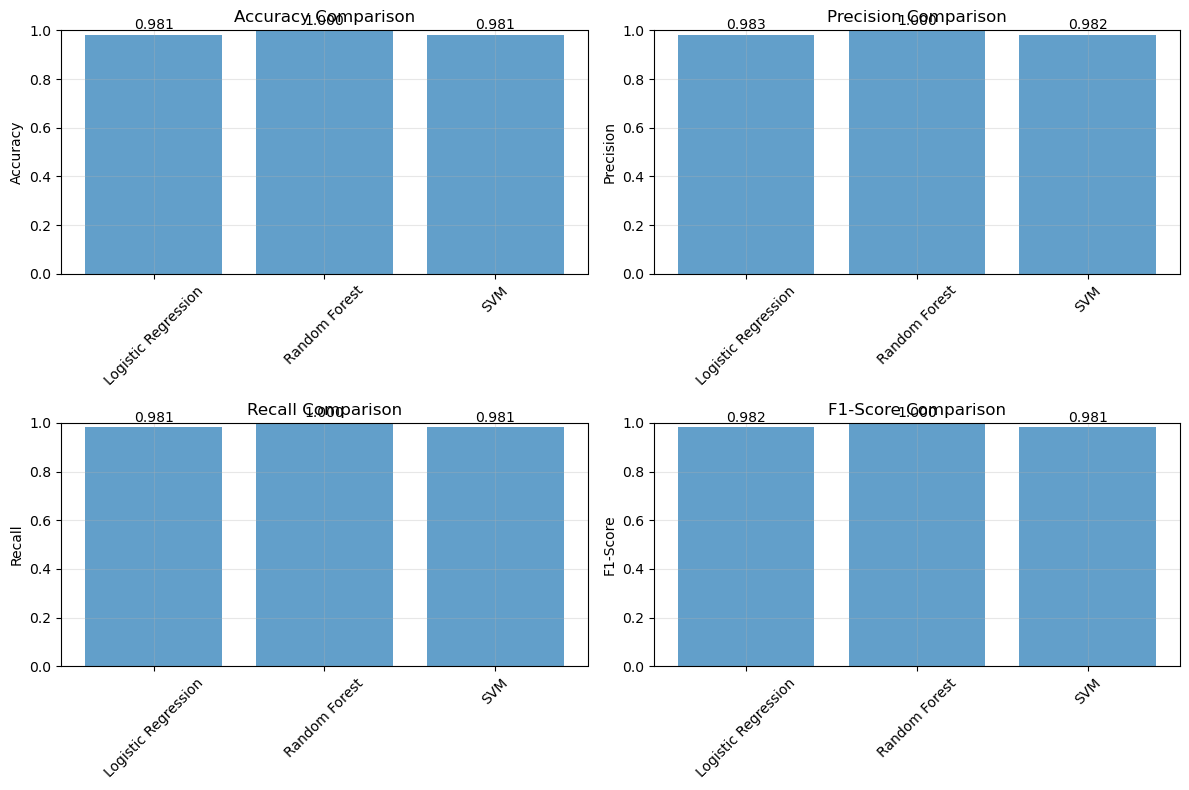

In [7]:
# Load wine dataset for comparison
wine = datasets.load_wine()
X_wine = wine.data
y_wine = wine.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Use scaled data for all models
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    }

# Display results
results_df = pd.DataFrame(results).T
print("Model Comparison Results:")
print(results_df.round(3))

# Visualize comparison
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x_pos = np.arange(len(models))

plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 2, i+1)
    values = [results[model][metric] for model in models.keys()]
    bars = plt.bar(x_pos, values, alpha=0.7)
    plt.xticks(x_pos, models.keys(), rotation=45)
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')
    plt.ylim(0, 1)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Multiple Feature Regression: Extending Beyond Simple Linear Models

Real-world problems rarely involve single features. This section explores regression with multiple features, advanced regularization techniques, and ensemble methods that handle complex, high-dimensional relationships.

### The Multiple Linear Regression Model

**Extended Mathematical Formulation**:
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon$$

In matrix notation: $\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$

Where:
- $\mathbf{X} \in \mathbb{R}^{n \times (p+1)}$ includes intercept column
- $\boldsymbol{\beta} \in \mathbb{R}^{p+1}$ are regression coefficients
- $p$ is the number of features (can be large)

### Challenges in High-Dimensional Regression

**1. Multicollinearity**: When features are highly correlated
- Makes coefficients unstable and difficult to interpret
- Can lead to numerical instability in $(\mathbf{X}^T\mathbf{X})^{-1}$

**2. Overfitting**: Model memorizes training data
- Becomes severe when $p$ approaches or exceeds $n$
- High variance in predictions

**3. Computational Complexity**: 
- Matrix inversion: $O(p^3)$
- Memory requirements: $O(p^2)$

### Regularization: The Mathematical Solution

**Problem with OLS**: Minimizes only training error
$$\min_{\boldsymbol{\beta}} \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|_2^2$$

**Regularization adds penalty** for model complexity:
$$\min_{\boldsymbol{\beta}} \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|_2^2 + \lambda \Omega(\boldsymbol{\beta})$$

where $\Omega(\boldsymbol{\beta})$ is the regularization term and $\lambda \geq 0$ controls strength.

### Ridge Regression (L2 Regularization)

**Objective Function**:
$$\min_{\boldsymbol{\beta}} \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|_2^2 + \lambda \|\boldsymbol{\beta}\|_2^2$$

**Analytical Solution**:
$$\hat{\boldsymbol{\beta}}_{\text{ridge}} = (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}$$

**Key Properties**:
- **Shrinkage**: Coefficients shrunk towards zero proportionally
- **Bias-Variance**: Introduces bias to reduce variance
- **Multicollinearity**: Handles correlated features well
- **Always has solution**: $\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I}$ is always invertible

**Geometric Interpretation**: 
- OLS finds point closest to data in unconstrained space
- Ridge constrains coefficients to sphere: $\|\boldsymbol{\beta}\|_2^2 \leq t$

### Lasso Regression (L1 Regularization)

**Objective Function**:
$$\min_{\boldsymbol{\beta}} \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|_2^2 + \lambda \|\boldsymbol{\beta}\|_1$$

where $\|\boldsymbol{\beta}\|_1 = \sum_{j=1}^{p} |\beta_j|$

**Key Properties**:
- **Sparsity**: Can set coefficients exactly to zero
- **Feature selection**: Automatically selects relevant features
- **No closed form**: Requires iterative optimization (coordinate descent)

**Geometric Interpretation**:
- Constrains coefficients to diamond: $\|\boldsymbol{\beta}\|_1 \leq t$
- Sharp corners promote sparse solutions

### Elastic Net: Best of Both Worlds

**Combines L1 and L2 penalties**:
$$\min_{\boldsymbol{\beta}} \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|_2^2 + \lambda \left( \alpha \|\boldsymbol{\beta}\|_1 + (1-\alpha) \|\boldsymbol{\beta}\|_2^2 \right)$$

**Parameters**:
- $\lambda$: Overall regularization strength
- $\alpha \in [0,1]$: Mixing parameter
  - $\alpha = 1$: Pure Lasso
  - $\alpha = 0$: Pure Ridge
  - $\alpha = 0.5$: Equal mix

**Advantages**:
- **Group selection**: Selects groups of correlated features
- **Stability**: More stable than Lasso with correlated features
- **Sparsity**: Can still zero out irrelevant features

### Mathematical Analysis of Regularization

**Bias-Variance Decomposition for Ridge**:
$$\mathbb{E}[(\hat{y} - y)^2] = \text{Bias}^2 + \text{Variance} + \sigma^2$$

- **Bias increases** with $\lambda$: $\text{Bias}^2 = \lambda^2 \boldsymbol{\beta}^T(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-2}\boldsymbol{\beta}$
- **Variance decreases** with $\lambda$: $\text{Variance} = \sigma^2 \text{tr}[(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{X}]$

**Optimal $\lambda$**: Balances bias-variance trade-off

### Cross-Validation for Hyperparameter Selection

**Grid Search**: Try predefined values
```python
lambda_values = [0.001, 0.01, 0.1, 1, 10, 100]
```

**Random Search**: Sample from distribution
$$\log(\lambda) \sim \text{Uniform}(-6, 2)$$

**Bayesian Optimization**: Use probabilistic model of objective function

### Ensemble Methods for Regression

**Motivation**: Combine multiple models to reduce prediction error

**Random Forest for Regression**:
- Each tree predicts continuous value
- Final prediction: $\hat{y} = \frac{1}{B}\sum_{b=1}^{B} T_b(\mathbf{x})$
- Variance reduction through averaging

**Gradient Boosting for Regression**:
- Sequential ensemble: each model corrects previous errors
- **Algorithm**:
  1. Initialize: $F_0(\mathbf{x}) = \arg\min_{\gamma} \sum_{i=1}^{n} L(y_i, \gamma)$
  2. For $m = 1$ to $M$:
     - Compute residuals: $r_{im} = -\frac{\partial L(y_i, F_{m-1}(\mathbf{x}_i))}{\partial F_{m-1}(\mathbf{x}_i)}$
     - Fit model to residuals: $h_m(\mathbf{x})$
     - Update: $F_m(\mathbf{x}) = F_{m-1}(\mathbf{x}) + \nu h_m(\mathbf{x})$

**Key Parameters**:
- **Learning rate** $\nu$: Controls step size (typically 0.01-0.3)
- **Number of estimators**: More trees = better fit but slower
- **Tree depth**: Controls complexity of base learners

### Feature Engineering and Polynomial Features

**Polynomial Features**: Create interaction terms
$$\phi(\mathbf{x}) = [1, x_1, x_2, x_1^2, x_1 x_2, x_2^2, ...]$$

**Mathematical Formulation**:
For degree $d$, number of features grows as $\binom{p+d}{d}$

**Benefits**:
- Captures non-linear relationships
- Can improve model expressiveness

**Risks**:
- Rapid feature explosion
- Increased overfitting risk
- Computational complexity

### Model Evaluation and Selection

**Training vs. Validation vs. Test Error**:
- **Training error**: Performance on training data
- **Validation error**: Used for model selection
- **Test error**: Final unbiased estimate

**Learning Curves**: Plot performance vs. training set size
- **Diagnostic tool**: Identify overfitting vs. underfitting
- **High bias**: Training and validation error both high
- **High variance**: Large gap between training and validation error

**Validation Curves**: Plot performance vs. hyperparameter
- **Identifies optimal values**: Sweet spot between under/overfitting
- **Shows sensitivity**: How much performance depends on parameter

### Practical Guidelines

**Feature Scaling**: Critical for regularized models
$$x_{\text{scaled}} = \frac{x - \mu}{\sigma}$$

**Why necessary**:
- Regularization penalties depend on coefficient magnitude
- Features with larger scales dominate without scaling
- Algorithms converge faster with similar scales

**Hyperparameter Tuning Strategy**:
1. **Start broad**: Wide range of values
2. **Narrow down**: Focus on promising regions
3. **Cross-validate**: Use k-fold for robust estimates
4. **Consider computation**: Balance accuracy vs. speed

**Model Complexity Guidelines**:
- **Start simple**: Linear models first
- **Add complexity gradually**: Monitor validation performance
- **Regularize**: Use Ridge/Lasso for high-dimensional data
- **Ensemble**: Combine multiple models for best performance

**Interpretation Considerations**:
- **Linear models**: Coefficients have clear meaning
- **Regularized models**: Coefficients are biased towards zero
- **Ensemble models**: Individual predictions hard to interpret
- **Feature importance**: Use permutation importance for black-box models

### Advanced Topics

**Bayesian Linear Regression**: Uncertainty quantification
$$p(\boldsymbol{\beta}|\mathbf{y}, \mathbf{X}) \propto p(\mathbf{y}|\mathbf{X}, \boldsymbol{\beta}) p(\boldsymbol{\beta})$$

**Online Learning**: Update models with streaming data
$$\boldsymbol{\beta}_{t+1} = \boldsymbol{\beta}_t - \eta_t \nabla \mathcal{L}(\boldsymbol{\beta}_t)$$

**Robust Regression**: Less sensitive to outliers
- **Huber loss**: Combines MSE and MAE
- **RANSAC**: Random sampling consensus

Regression Model Comparison:
                   R² Score    RMSE     MAE
Linear Regression     0.990   9.054   7.453
Ridge Regression      0.990   9.032   7.380
Random Forest         0.901  27.786  21.826
Gradient Boosting     0.919  25.198  19.268


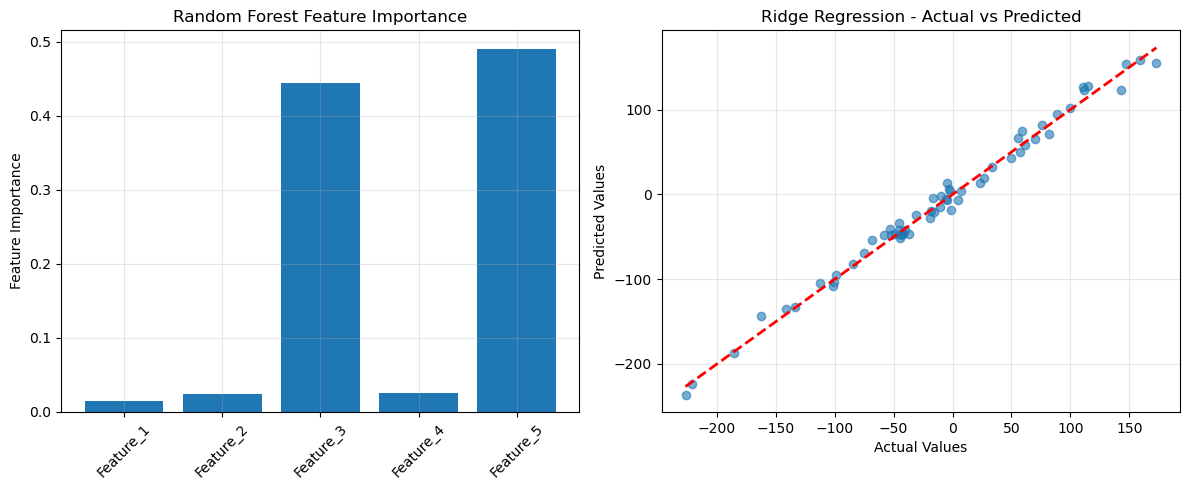


Best regression model: Ridge Regression
R² Score: 0.990


In [8]:
# Generate synthetic multi-feature dataset
from sklearn.datasets import make_regression

X_reg, y_reg = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)
feature_names = [f'Feature_{i+1}' for i in range(5)]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Compare regression models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge

reg_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

reg_results = {}
for name, model in reg_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mae = metrics.mean_absolute_error(y_test, y_pred)
    
    reg_results[name] = {
        'R² Score': r2,
        'RMSE': rmse,
        'MAE': mae
    }

# Display regression results
reg_results_df = pd.DataFrame(reg_results).T
print("Regression Model Comparison:")
print(reg_results_df.round(3))

# Feature importance for tree-based models
plt.figure(figsize=(12, 5))

# Random Forest feature importance
plt.subplot(1, 2, 1)
rf_reg = reg_models['Random Forest']
importance_rf = rf_reg.feature_importances_
plt.bar(feature_names, importance_rf)
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Actual vs Predicted for best model
plt.subplot(1, 2, 2)
best_model_name = reg_results_df['R² Score'].idxmax()
best_model = reg_models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'{best_model_name} - Actual vs Predicted')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nBest regression model: {best_model_name}")
print(f"R² Score: {reg_results[best_model_name]['R² Score']:.3f}")

## The Complete Scikit-learn Workflow: From Theory to Practice

This section synthesizes everything we've learned into a comprehensive, systematic approach to machine learning projects. Understanding the workflow is crucial for applying machine learning effectively in real-world scenarios.

### The Machine Learning Project Lifecycle

**1. Problem Definition and Scoping**
**2. Data Collection and Understanding**
**3. Exploratory Data Analysis (EDA)**
**4. Data Preprocessing and Feature Engineering**
**5. Model Selection and Training**
**6. Model Evaluation and Validation**
**7. Model Interpretation and Communication**
**8. Deployment and Monitoring**

Let's explore each phase with mathematical foundations and practical considerations.

### Phase 1: Problem Definition

**Key Questions**:
- What type of ML problem is this? (supervised/unsupervised)
- What is the target variable? (continuous/categorical)
- What constitutes success? (business metrics vs. ML metrics)
- What are the constraints? (interpretability, latency, fairness)

**Mathematical Formulation**:
- **Regression**: $f: \mathcal{X} \rightarrow \mathbb{R}$
- **Binary Classification**: $f: \mathcal{X} \rightarrow \{0, 1\}$
- **Multi-class Classification**: $f: \mathcal{X} \rightarrow \{1, 2, ..., K\}$
- **Clustering**: Find partition $\mathcal{C} = \{C_1, C_2, ..., C_k\}$ of $\mathcal{X}$

### Phase 2: Data Understanding

**Data Quality Assessment**:

**Completeness**: Missing data analysis
$$\text{Missing Rate}_j = \frac{\text{# missing values in feature } j}{n}$$

**Consistency**: Check for contradictions and outliers
$$\text{Outlier Score} = \frac{|x_i - \text{median}|}{\text{MAD}}$$

where MAD is Median Absolute Deviation.

**Distribution Analysis**: Understand feature distributions
- **Numerical features**: Histograms, box plots, Q-Q plots
- **Categorical features**: Frequency tables, bar charts

### Phase 3: Exploratory Data Analysis

**Univariate Analysis**: Examine each feature individually
- **Central tendency**: Mean, median, mode
- **Spread**: Standard deviation, IQR
- **Shape**: Skewness, kurtosis

**Bivariate Analysis**: Relationships between features
- **Correlation matrix**: $\rho_{ij} = \frac{\text{Cov}(X_i, X_j)}{\sqrt{\text{Var}(X_i)\text{Var}(X_j)}}$
- **Scatter plots**: Visual relationships
- **Cross-tabulations**: For categorical variables

**Target Variable Analysis**:
- **Class imbalance**: $\text{Imbalance Ratio} = \frac{\max_k n_k}{\min_k n_k}$
- **Target distribution**: Affects choice of algorithms and metrics

### Phase 4: Data Preprocessing

**Missing Value Handling**:

**Deletion Strategies**:
- **Listwise deletion**: Remove rows with any missing values
- **Pairwise deletion**: Use available data for each analysis

**Imputation Strategies**:
- **Mean/Median/Mode**: $\hat{x}_j = \text{central tendency of } X_j$
- **K-NN Imputation**: Use $k$ nearest neighbors
  $$\hat{x}_{ij} = \frac{1}{k}\sum_{l \in \mathcal{N}_k(i)} x_{lj}$$
- **Multiple Imputation**: Generate multiple plausible values

**Feature Scaling**:

**Standardization (Z-score normalization)**:
$$z = \frac{x - \mu}{\sigma}$$
- Results in $\mu = 0, \sigma = 1$
- Preserves distribution shape
- Good for algorithms assuming normal distribution

**Min-Max Scaling**:
$$x' = \frac{x - \min(x)}{\max(x) - \min(x)}$$
- Results in range $[0, 1]$
- Preserves relationships
- Sensitive to outliers

**Robust Scaling**:
$$x' = \frac{x - \text{median}(x)}{\text{IQR}(x)}$$
- Uses median and IQR instead of mean and std
- Less sensitive to outliers

**Feature Engineering**:

**Domain-specific transformations**:
- **Log transformation**: For right-skewed data, $\log(x + 1)$
- **Polynomial features**: Capture non-linear relationships
- **Interaction terms**: $x_i \times x_j$ for feature interactions
- **Binning**: Convert continuous to categorical

### Phase 5: Model Selection Framework

**Algorithm Selection Criteria**:

**Data Size Considerations**:
- **Small data** ($n < 1000$): Simple models (linear, naive Bayes)
- **Medium data** ($1000 < n < 100000$): Most algorithms work
- **Large data** ($n > 100000$): Scalable algorithms (SGD, random forest)

**Feature Count Considerations**:
- **Low-dimensional** ($p < 100$): Any algorithm
- **High-dimensional** ($p > 1000$): Regularized models, feature selection
- **$p > n$**: Regularization essential

**Algorithm Complexity vs. Data Size**:
| Algorithm | Training Complexity | Prediction Complexity | Memory |
|-----------|-------------------|---------------------|---------|
| Linear Regression | $O(np^2)$ | $O(p)$ | $O(p)$ |
| Logistic Regression | $O(npi)$ | $O(p)$ | $O(p)$ |
| Random Forest | $O(np\log n)$ | $O(\log n)$ | $O(\text{trees})$ |
| SVM | $O(n^3)$ | $O(\text{support vectors})$ | $O(\text{support vectors})$ |
| K-Means | $O(nki)$ | $O(k)$ | $O(k)$ |

### Phase 6: Model Evaluation Framework

**Cross-Validation Strategies**:

**Stratified K-Fold**: For classification
- Maintains class proportions in each fold
- Reduces variance in evaluation

**Time Series Split**: For temporal data
- Respects temporal order
- Uses past to predict future

**Group K-Fold**: For grouped data
- Ensures groups don't appear in both train and validation

**Evaluation Metrics Selection**:

**Business Impact Considerations**:
- **False Positive Cost**: Cost of incorrect positive prediction
- **False Negative Cost**: Cost of missed positive case
- **Decision Threshold**: Optimize based on business costs

**Cost-Sensitive Evaluation**:
$$\text{Cost} = C_{FP} \times FP + C_{FN} \times FN$$

where $C_{FP}$ and $C_{FN}$ are business costs.

### Phase 7: Model Interpretation

**Linear Model Interpretation**:
- **Coefficient magnitude**: Importance of features
- **Coefficient sign**: Direction of relationship
- **Confidence intervals**: Uncertainty in estimates

**Tree-Based Model Interpretation**:
- **Feature importance**: Based on impurity reduction
- **Partial dependence plots**: Effect of individual features
- **Tree visualization**: Decision paths

**Model-Agnostic Interpretation**:
- **Permutation importance**: Feature importance for any model
- **LIME**: Local explanations
- **SHAP**: Unified framework for feature attribution

### Phase 8: Production Considerations

**Model Serialization**:
```python
# Save model
import joblib
joblib.dump(model, 'model.pkl')

# Load model
model = joblib.load('model.pkl')
```

**Performance Monitoring**:
- **Data drift**: Distribution changes in features
- **Concept drift**: Changes in underlying relationships
- **Performance degradation**: Monitor key metrics over time

### Common Workflow Patterns

**Pattern 1: Simple Classification Pipeline**
```python
# 1. Load and split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 2. Preprocess
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 4. Evaluate
y_pred = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
```

**Pattern 2: Advanced Pipeline with Cross-Validation**
```python
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Define parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, None]
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
```

### Best Practices Summary

**Data Handling**:
1. **Always split data first**: Before any preprocessing
2. **Avoid data leakage**: Don't use future information to predict past
3. **Validate preprocessing**: Check distributions after transformations
4. **Handle missing values thoughtfully**: Consider domain knowledge

**Model Development**:
1. **Start simple**: Baseline models first
2. **Use cross-validation**: For robust evaluation
3. **Monitor overfitting**: Compare train/validation performance
4. **Feature engineering**: Often more important than algorithm choice

**Evaluation**:
1. **Multiple metrics**: Don't rely on single metric
2. **Statistical significance**: Test if differences are meaningful
3. **Business relevance**: Align ML metrics with business goals
4. **Confidence intervals**: Quantify uncertainty

**Documentation**:
1. **Track experiments**: Record all attempts and results
2. **Version control**: Code, data, and models
3. **Reproducibility**: Set random seeds, document environment
4. **Interpretation**: Always try to understand why model works

### Advanced Workflow Considerations

**Automated Machine Learning (AutoML)**:
- **Feature selection**: Automatic relevance determination
- **Algorithm selection**: Try multiple algorithms automatically
- **Hyperparameter optimization**: Bayesian optimization, random search
- **Ensemble methods**: Combine multiple models automatically

**MLOps Integration**:
- **Continuous Integration**: Automated testing of model code
- **Model versioning**: Track model versions and performance
- **A/B testing**: Compare model versions in production
- **Monitoring**: Real-time performance tracking

**Ethical Considerations**:
- **Fairness**: Ensure model doesn't discriminate
- **Transparency**: Make decisions explainable
- **Privacy**: Protect sensitive information
- **Bias detection**: Check for systematic biases in data and models

This comprehensive workflow provides a systematic approach to machine learning projects, ensuring both mathematical rigor and practical effectiveness.

In [9]:
# Summary of typical scikit-learn workflow
workflow_steps = """
Typical Scikit-learn Workflow:

1. Data Preparation:
   - Load data (datasets.load_*, pd.read_csv, etc.)
   - Handle missing values
   - Feature engineering

2. Data Splitting:
   - train_test_split() for train/test sets
   - Consider stratification for imbalanced data

3. Feature Scaling (if needed):
   - StandardScaler for normal distribution
   - MinMaxScaler for bounded features
   - RobustScaler for outliers

4. Model Selection:
   - Choose appropriate algorithm
   - Consider problem type (classification/regression)
   - Consider data size and dimensionality

5. Model Training:
   - model.fit(X_train, y_train)
   - Hyperparameter tuning (GridSearchCV, RandomizedSearchCV)

6. Model Evaluation:
   - Predictions: model.predict()
   - Metrics: accuracy, precision, recall, F1, R², RMSE
   - Cross-validation: cross_val_score()

7. Model Interpretation:
   - Feature importance (tree-based models)
   - Coefficients (linear models)
   - Confusion matrices, ROC curves

Common Algorithms by Use Case:

Classification:
- Logistic Regression (interpretable, fast)
- Random Forest (robust, handles mixed data types)
- SVM (good for high-dimensional data)
- Gradient Boosting (often high performance)

Regression:
- Linear Regression (simple, interpretable)
- Ridge/Lasso (regularized linear models)
- Random Forest (robust, non-linear)
- Gradient Boosting (often high performance)

Clustering:
- K-Means (spherical clusters)
- DBSCAN (arbitrary shapes, handles noise)
- Hierarchical clustering (dendrograms)

Dimensionality Reduction:
- PCA (linear reduction)
- t-SNE (non-linear, visualization)
- UMAP (non-linear, preserves structure)
"""

print(workflow_steps)


Typical Scikit-learn Workflow:

1. Data Preparation:
   - Load data (datasets.load_*, pd.read_csv, etc.)
   - Handle missing values
   - Feature engineering

2. Data Splitting:
   - train_test_split() for train/test sets
   - Consider stratification for imbalanced data

3. Feature Scaling (if needed):
   - StandardScaler for normal distribution
   - MinMaxScaler for bounded features
   - RobustScaler for outliers

4. Model Selection:
   - Choose appropriate algorithm
   - Consider problem type (classification/regression)
   - Consider data size and dimensionality

5. Model Training:
   - model.fit(X_train, y_train)
   - Hyperparameter tuning (GridSearchCV, RandomizedSearchCV)

6. Model Evaluation:
   - Predictions: model.predict()
   - Metrics: accuracy, precision, recall, F1, R², RMSE
   - Cross-validation: cross_val_score()

7. Model Interpretation:
   - Feature importance (tree-based models)
   - Coefficients (linear models)
   - Confusion matrices, ROC curves

Common Algorithms by